In [10]:
import urllib3, nltk
from bs4 import BeautifulSoup

import numpy as np
import pandas as pd

#Librerías para imaxes, nubes de palabras e plot
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt

#Librarías para limpieza de datos
import string
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/rchamac/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Funcion obtener_noticias(lista_medios)

Recibe una lista con los medios digitales y devuelve un string con el texto de los titulares

In [11]:
def obtener_noticias(lista_medios):
    ua = "Mozilla/5.0 (Linux; U; Android 2.2; en-us; Nexus One Build/FRF91) AppleWebKit/533.1 (KHTML, like Gecko) Version/4.0 Mobile Safari/533.1"  
    h = {"User-Agent": ua}
    http = urllib3.PoolManager()
    web_solotexto=""
    for item in lista_medios:
        r = http.request('GET',item,fields=None,headers=h)
        sopa = BeautifulSoup(r.data, "html.parser")
        titulares = sopa.find_all('h4')
        for titular in titulares:
            web_solotexto += titular.get_text().strip()

    salida = ''
    
    for linea in web_solotexto.split('\n'):
        aux=linea.strip()
        if aux and len(aux) > 50:
            salida += aux + '\n'

    return salida
   




### Función limpiar_texto(texto)

Recibe un texto, elimina los signos de puntuación, a continuación elimina del texto la lista de palabras de stopwords en español mas una lista que hacemos personalizada.
Al final devuelve una lista de palabras.


In [12]:
def limpiar_texto(texto):
    punctuation=[]
    for s in string.punctuation:
        punctuation.append(str(s))
    sp_punctuation = ["¿", "¡", "“", "”", "…", ":", "–", "»", "«",".","\n",">","/"]    
    punctuation += sp_punctuation 
    stop_words = stopwords.words('spanish') #Listado de palabras a eliminar
    stop_words += ["\u200b", "\xa0","h4", "tras","años","para", "como", "puede","cómo", "hacer", "forma","después", "uso", "cualquier", "parte", "hace", "además", "según", "convencional", "pueden", "ser","de","y","estos","con","finalidad","que","su"] #Añadimos algunos caractéres que hemos encontrado

    for sw in stop_words:
        clean_texto = texto.lower().replace(sw,"")
        
    for p in punctuation:
        clean_texto = clean_texto.replace(p,"")
    
    #Reemplazamos stop_words por "":    
    for stop in stop_words:
        clean_texto_list = clean_texto.split()
        clean_texto_list = [i.strip() for i in clean_texto_list]
        try:
            while stop in clean_texto_list: clean_texto_list.remove(stop)
        except:
            print("Error")
            pass
        clean_texto= " ".join(clean_texto_list)
    return clean_texto

### Función generar_lista_palabras(lista)

Recibe una lista de palabras y la pasa por un filtro personalizado en el que quitamos las palabras cortas (en este caso menores de 4 letras) o largas (mayores de 12 letras)

In [13]:
def generar_lista_palabras(lista_palabras):
    lista_texto = lista_palabras.split(" ")
    palabras = []
    for palabra in lista_texto:
        if (len(palabra)>=3 and len(palabra)<12):
            palabras.append(palabra)
            
    return palabras

### Función contar_palabras(lista)

Recibe una lista de palabras y cuenta cuantas veces aparece cada una de ellas (usando el diccionario word_count)
Prepara un dataframe para presentar los datos

In [14]:
def contar_palabras(lista_palabras):
    word_count={}
    for palabra in lista_palabras:
        if palabra in word_count.keys():
            word_count[palabra][0]+=1
        else:
            word_count[palabra]=[1]
            
    df = pd.DataFrame.from_dict(word_count).transpose()
    df.columns=["freq"]
    df.sort_values(["freq"], ascending=False, inplace=True)
    df.head(10)
    return df

### Funcion plot_bar(data, top)

Representa los datos en un grafico

In [15]:
def plot_bar(data, top):    
    fig = plt.figure()
    ax = fig.add_axes([0,0,2,1])
    ax.bar(x =data.iloc[:top,:].index, height = data.iloc[:top,0].values)
    plt.show()

### Funcion generar_nube_palabras(lista)

Recibe un texto y genera la nube.

In [16]:
def generar_nube_palabras(noticias):
    noticias = limpiar_texto(noticias)
    word_cloud = WordCloud(height=800, width=800, background_color='white',max_words=150, min_font_size=5).generate(noticias)
    #word_cloud.to_file("./img/ejemplo_sencillo.png") #Guardamos la imagen generada
    #word_cloud.to_file("./img/ejemplo_sencillo.png") #Guardamos la imagen generada
    plt.figure(figsize=(10,8))
    plt.imshow(word_cloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()

{'La voz de galicia': 'http://www.lavozdegalicia.com', 'El mundo': 'http://www.elmundo.es', 'El pais': 'http://www.elpais.com'}
['http://www.lavozdegalicia.com', 'http://www.elmundo.es', 'http://www.elpais.com']


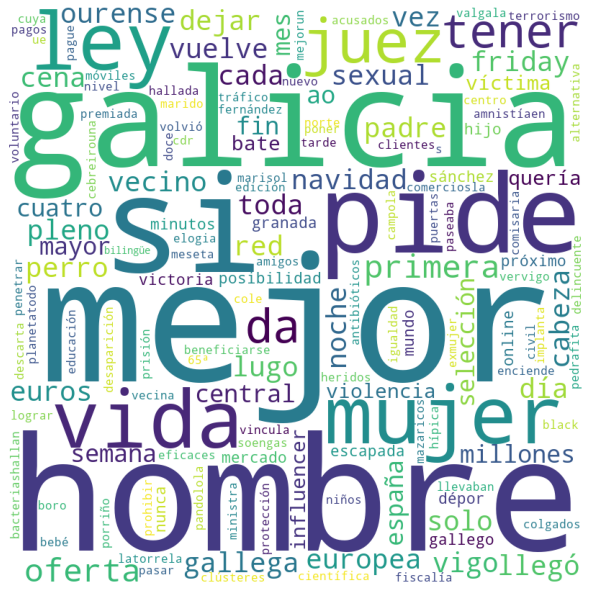

In [17]:
#listaMedios= ["http://www.lavozdegalicia.com","http://www.elmundo.es","http://www.elpais.com"]

import json
listaMedios = []
with open("listaMedios.json","r") as j:
    lista_Medios = json.load(j)
    
    
for medio in lista_Medios.keys():
    #print(lista_Medios[medio])
    listaMedios.append(lista_Medios[medio])
    
    
noticias = obtener_noticias(listaMedios) 
#noticias = quitar_HTML(noticias) 
noticias = limpiar_texto(noticias) 
lista_palabras =generar_lista_palabras(noticias)
df = contar_palabras(lista_palabras)
#funciones.plot_bar(data=df, top=5)
generar_nube_palabras(noticias)